# Resultados: Concorrente

Modelo para previsão de Ferrugem Asiática baseado em precipitação, do estado da arte. Utiliza os conceitos de severidade acumulada, determinando thresholds (limiares) de detecção em 5d, 10d e 15d de valor de severidade acumulada, valores em dias antes da ocorrência.

### test_severity_model_results.csv
Instâncias usadas no teste (10%) com resultados para determinar os resultados de erro

### day_in_planting
Dia relativo da ocorrência da ferrugem (reportada) no plantio, a partir da data de inicio da safra. Anteriormente, era usado o day_in_harvest (dia relativo na safra), mas é mais preciso usar relativo à data de início de plantio de cada ocorrência.

### day_in_planting_5d, day_in_planting_10d, day_in_planting_15d
Dia **previsto** usando o limiar de 5, 10 ou 15 dias antes do dia relativo da ocorrência

### threshold_5d, threshold_10d, threshold_15d
Limiar calculado a partir da **média de severidade acumulada** em 5, 10 ou 15 dias antes da data de ocorrência atual. Calculado com o dataset de treino (restante 90% do dataset).

In [1]:
import pandas as pd

from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-05-14 15:00'

In [2]:
# Instâncias de teste com resultados, para todas as safras
all_harvests_result_df = pd.read_csv("Data/concorrente_results_all.csv", sep=",")

print(f"line count: {all_harvests_result_df.shape[0]}")
all_harvests_result_df.head(10)

line count: 5060


,Unnamed: 0,index,ocorrencia_id,segment_id_precipitation,planting_start_date,planting_relative_day,threshold_5d,severity_acc_5d,predicted_planting_relative_day_5d,threshold_10d,severity_acc_10d,predicted_planting_relative_day_10d,threshold_15d,severity_acc_15d,predicted_planting_relative_day_15d,fold
0,0,1917,9257,1644.0,2008-12-26,68,251.581469,251.1741,59,232.326172,227.7823,58,212.619375,209.6727,58,1
1,1,3567,6174,1204.0,2007-11-22,82,251.581469,241.7865,99,232.326172,230.1209,96,212.619375,205.8842,85,1
2,2,3224,6890,1291.0,2007-12-08,82,251.581469,249.3386,84,232.326172,229.7805,76,212.619375,204.7665,75,1
3,3,5041,62,1995.0,2004-11-19,46,251.581469,251.4346,218,232.326172,231.9971,203,212.619375,209.7371,201,1
4,4,4014,5021,1707.0,2007-11-04,46,251.581469,238.4588,90,232.326172,217.5118,86,212.619375,206.0649,90,1
5,5,843,13469,573.0,2011-11-13,82,251.581469,249.6712,140,232.326172,230.5352,140,212.619375,211.6487,122,1
6,6,4416,2595,1835.0,2006-10-22,82,251.581469,249.6793,81,232.326172,225.4802,83,212.619375,202.6470,79,1
7,7,2900,7516,1644.0,2008-11-20,68,251.581469,249.1517,81,232.326172,231.2305,85,212.619375,207.5973,85,1
8,8,108,17939,1996.0,2020-11-17,56,251.581469,231.5616,39,232.326172,231.5616,44,212.619375,208.5473,46,1
9,9,4840,1020,2558.0,2005-11-25,46,251.581469,248.8041,87,232.326172,228.2723,87,212.619375,202.9789,89,1


<Axes: title={'center': "Distribuição de 'dia relativo do plantio' ocorrido (baseline) >2024-05-14 15:00<"}, ylabel='Frequency'>

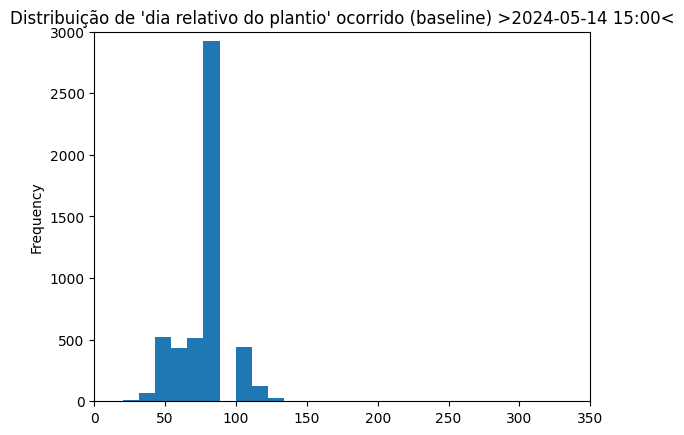

In [3]:
all_harvests_result_df["planting_relative_day"].plot(kind="hist", xlim=(0, 350), ylim=(0, 3000), title=f"Distribuição de 'dia relativo do plantio' ocorrido (baseline) >{current_datetime_gen}<")


<Axes: title={'center': "Distribuição de 'dia relativo do plantio' previsto (baseline) >2024-05-14 15:00<"}, ylabel='Frequency'>

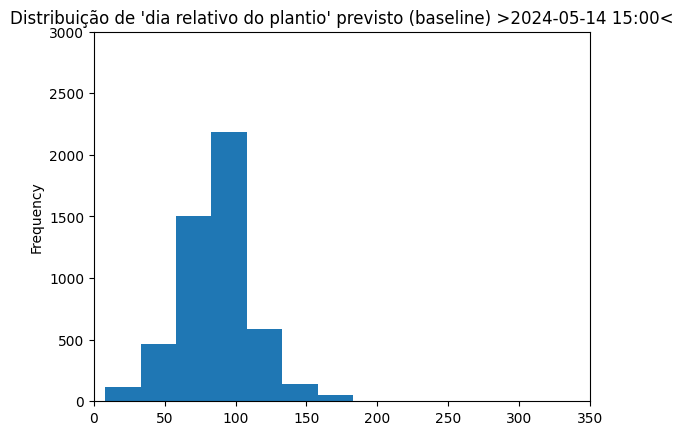

In [4]:
all_harvests_result_df["predicted_planting_relative_day_5d"].plot(kind="hist", xlim=(0, 350), ylim=(0, 3000), title=f"Distribuição de 'dia relativo do plantio' previsto (baseline) >{current_datetime_gen}<")

## Erro para todas as safras

In [5]:
# Talvez seja necessário ajustar para considerar os folds!
# TODO: Verificar o porquê dos erros estarem errados muito errados para cima aqui!

import math

df = all_harvests_result_df

# calculating average accuracy for 5d, 10d and 15d
df['distance_5d'] = pow(df['predicted_planting_relative_day_5d'] - df['planting_relative_day'], 2)
df['distance_10d'] = pow(df['predicted_planting_relative_day_10d'] - df['planting_relative_day'], 2)
df['distance_15d'] = pow(df['predicted_planting_relative_day_15d'] - df['planting_relative_day'], 2)

error_rmse = {
    'error_5d': math.sqrt(df['distance_5d'].sum() / df.shape[0]),
    'error_10d': math.sqrt(df['distance_10d'].sum() / df.shape[0]),
    'error_15d': math.sqrt(df['distance_15d'].sum() / df.shape[0]),
}
best_error_rmse = min(error_rmse, key=error_rmse.get)

print(f"======> Average error for 5d: {error_rmse['error_5d']}")
print(f"======> Average error for 10d: {error_rmse['error_10d']}")
print(f"======> Average error for 15d: {error_rmse['error_15d']}")
print()
print(f"======> BEST average error: {best_error_rmse} ({round(error_rmse[best_error_rmse], 2)})")

# error_df = pd.DataFrame(
#     {
#         "error_type": ["error_5d", "error_10d", "error_15d"],
#         "value": [error_rmse['error_5d'], error_rmse['error_10d'], error_rmse['error_15d']],
#     }
# )


======> Average error for 5d: 31.51413510573391
======> Average error for 10d: 29.569383134795558
======> Average error for 15d: 27.49952209430229

======> BEST average error: error_15d (27.5)


[Text(0, 0, '27.4995')]

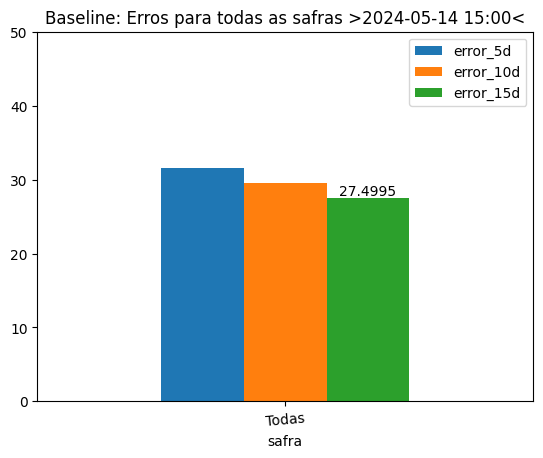

In [6]:
error_df = pd.DataFrame([{
        "safra": "Todas",
        "error_5d": error_rmse['error_5d'],
        "error_10d": error_rmse['error_10d'],
        "error_15d": error_rmse['error_15d'],
    }])

ax = error_df.plot(x="safra", y=["error_5d", "error_10d", "error_15d"], ylim=(0, 50), kind="bar", rot=5, fontsize=10, title=f"Baseline: Erros para todas as safras >{current_datetime_gen}<")
ax.bar_label(ax.containers[2])

## Erros para cada safra

In [7]:
each_harvest_result_df = pd.read_csv("Data/concorrente_results_harvest_all.csv")

each_harvest_result_df.head()

,Unnamed: 0,index,ocorrencia_id,segment_id_precipitation,planting_start_date,planting_relative_day,threshold_5d,severity_acc_5d,predicted_planting_relative_day_5d,threshold_10d,severity_acc_10d,predicted_planting_relative_day_10d,threshold_15d,severity_acc_15d,predicted_planting_relative_day_15d,safra,fold
0,0,18,18456,2154.0,2021-10-02,82,461.036100,453.8726,99,430.865520,429.3343,99,403.825887,402.0948,92,2021/2022,1
1,1,6,18673,1082.0,2021-12-16,82,461.036100,459.7706,89,430.865520,429.8599,88,403.825887,396.3725,87,2021/2022,1
2,2,7,18648,1016.0,2021-11-16,104,461.036100,460.5571,92,430.865520,424.9265,90,403.825887,386.4435,89,2021/2022,1
3,0,5,18674,1502.0,2021-12-17,82,475.785473,472.4176,92,443.648013,429.2260,94,417.320647,397.4131,98,2021/2022,2
4,1,9,18545,1016.0,2021-11-24,82,475.785473,466.4720,96,443.648013,441.1188,97,417.320647,415.5998,89,2021/2022,2


In [8]:
safras = each_harvest_result_df["safra"].unique()

print(safras)

['2021/2022' '2020/2021' '2019/2020' '2018/2019' '2017/2018' '2016/2017'
 '2015/2016' '2014/2015' '2013/2014' '2012/2013' '2011/2012' '2010/2011'
 '2009/2010' '2008/2009' '2007/2008' '2006/2007' '2005/2006' '2004/2005']


In [9]:
K_FOLDS = 5

each_harvest_fold_error_list = []

for safra in safras:
    for k_num in range(1, K_FOLDS + 1):
        df = each_harvest_result_df.copy()
        df = df[df["safra"] == safra]
        df = df[df["fold"] == k_num]
        
        # calculating average accuracy for 5d, 10d and 15d
        df['distance_5d'] = pow(df['predicted_planting_relative_day_5d'] - df['planting_relative_day'], 2)
        df['distance_10d'] = pow(df['predicted_planting_relative_day_10d'] - df['planting_relative_day'], 2)
        df['distance_15d'] = pow(df['predicted_planting_relative_day_15d'] - df['planting_relative_day'], 2)
        
        error_rmse = {
            'error_5d': math.sqrt(df['distance_5d'].sum() / df.shape[0]),
            'error_10d': math.sqrt(df['distance_10d'].sum() / df.shape[0]),
            'error_15d': math.sqrt(df['distance_15d'].sum() / df.shape[0]),
        }
        best_error_rmse = min(error_rmse, key=error_rmse.get)
        best_error_rmse_value = round(error_rmse[best_error_rmse], 2)
    
        # print(f"=====> Safra: {safra}")
        # print(f"=====> Fold: {k_num}")
        # print(f"=====> Average error for 5d: {error_rmse['error_5d']}")
        # print(f"=====> Average error for 10d: {error_rmse['error_10d']}")
        # print(f"=====> Average error for 15d: {error_rmse['error_15d']}")
        # print(f"=====> BEST average error: {best_error_rmse} ({best_error_rmse_value})")
        # print()
    
        each_harvest_fold_error_list.append({
            "safra": safra,
            "fold": k_num,
            "error_5d": error_rmse['error_5d'],
            "error_10d": error_rmse['error_10d'],
            "error_15d": error_rmse['error_15d'],
            "error_lowest": best_error_rmse,
            "error_lowest_value": best_error_rmse_value,
        })

In [10]:
each_harvest_fold_error_df = pd.DataFrame(each_harvest_fold_error_list)

each_harvest_fold_error_df.head(20)

,safra,fold,error_5d,error_10d,error_15d,error_lowest,error_lowest_value
0,2021/2022,1,12.675436,13.178265,10.801234,error_15d,10.80
1,2021/2022,2,19.966639,21.055482,20.041623,error_5d,19.97
2,2021/2022,3,18.421003,16.822604,15.758596,error_15d,15.76
3,2021/2022,4,28.035692,23.079572,24.906492,error_10d,23.08
4,2021/2022,5,19.373521,19.672316,18.806027,error_15d,18.81
5,2020/2021,1,20.262033,19.452506,17.877360,error_15d,17.88
6,2020/2021,2,22.195720,19.168985,17.375270,error_15d,17.38
7,2020/2021,3,15.959323,15.927963,15.708278,error_15d,15.71
8,2020/2021,4,15.822452,15.357409,14.688431,error_15d,14.69
9,2020/2021,5,12.849124,12.014574,12.457929,error_10d,12.01


In [11]:
df = each_harvest_fold_error_df.copy()
df = df[["safra", "error_5d", "error_10d", "error_15d"]].groupby("safra", as_index=False).mean()
df["error_lowest_value"] = df[["error_5d", "error_10d", "error_15d"]].min(axis=1)

each_harvest_error_df = df
each_harvest_error_df.head(40)

,safra,error_5d,error_10d,error_15d,error_lowest_value
0,2004/2005,27.610384,25.324793,23.454676,23.454676
1,2005/2006,23.557499,23.275754,22.959270,22.959270
2,2006/2007,15.444395,14.764398,13.984352,13.984352
3,2007/2008,20.554695,20.209705,19.555461,19.555461
4,2008/2009,24.852861,22.587254,21.535656,21.535656
5,2009/2010,23.460268,23.247092,22.026758,22.026758
6,2010/2011,20.475578,20.173877,20.151220,20.151220
7,2011/2012,23.796323,23.779375,22.529657,22.529657
8,2012/2013,17.537555,17.381378,16.801153,16.801153
9,2013/2014,13.181220,13.363982,13.733761,13.181220


<Axes: title={'center': 'Baseline: Erros para cada safra >2024-05-14 15:00<'}, xlabel='safra'>

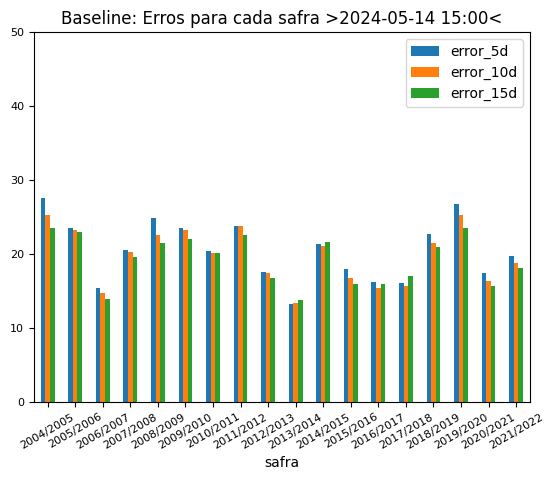

In [12]:
title = f"Baseline: Erros para cada safra >{current_datetime_gen}<"
each_harvest_error_df.plot(x="safra", y=["error_5d", "error_10d", "error_15d"], ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=title)


<Axes: title={'center': 'Baseline: Menores erros por safra >2024-05-14 15:00<'}, xlabel='safra'>

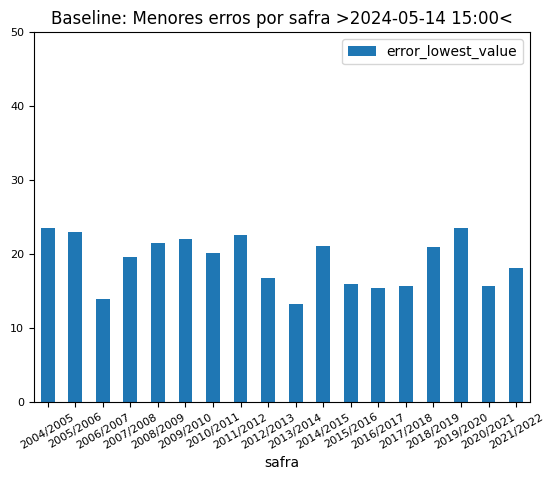

In [13]:
each_harvest_error_df.plot(x="safra", y="error_lowest_value", ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=f"Baseline: Menores erros por safra >{current_datetime_gen}<")